In [61]:
# This notebook analyses the ouput of 
# running complexity.py

! grep 'parsing_for_temporal_criticality:' complexity_results_all_cities_io_4_wide_margin_default_plus_minus_final_with_latest_metrics_run_1.txt | sed "s/parsing_for_temporal_criticality: //g" > Temporal_complexity_results_all_cities_io_4_standard_wide_margins_1.csv
! grep 'parsing_for_temporal_criticality:' complexity_results_all_cities_io_4_wide_margin_default_plus_minus_final_with_latest_metrics_run_2.txt | sed "s/parsing_for_temporal_criticality: //g" > Temporal_complexity_results_all_cities_io_4_standard_wide_margins_2.csv
! cat Temporal_complexity_results_all_cities_io_4_standard_wide_margins_1.csv Temporal_complexity_results_all_cities_io_4_standard_wide_margins_2.csv > Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv

! (echo "cityname i_o_length prediction_horizon grid_size time_stamp cx" && cat Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv) > filename1 && mv filename1 Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv
# headers: cityname i_o_length prediction_horizon grid_size time_stamp cx

In [62]:
import sys
import os

sys.path.append("../")
# ! pip install -r ../../../requirements.txt
import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm

In [63]:
city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

In [64]:
df.shape

(75000, 6)

(3000, 6)


generating-plot: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:19<00:00, 155.87it/s]


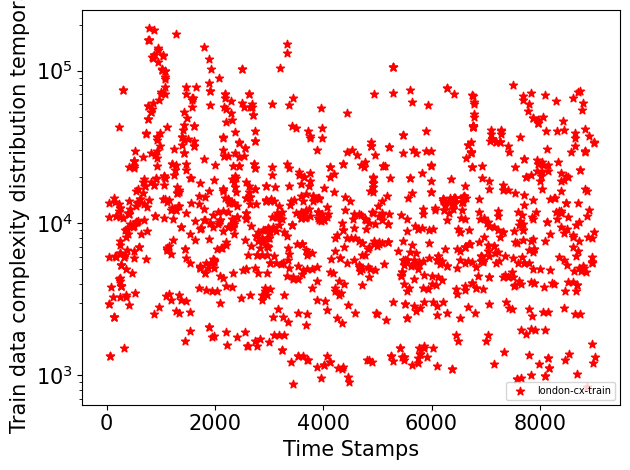

(3000, 6)


generating-plot: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:18<00:00, 160.18it/s]


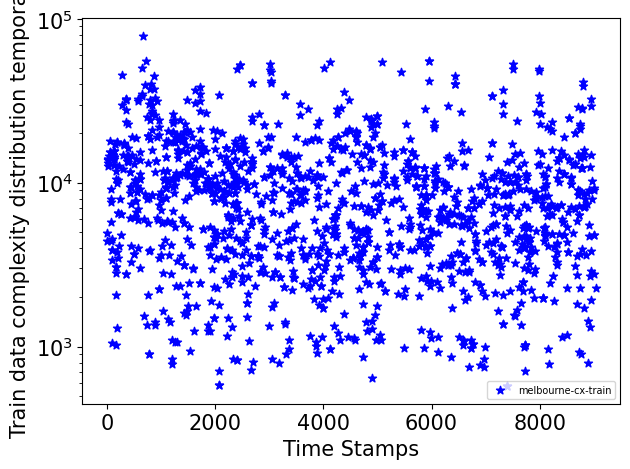

(3000, 6)


generating-plot: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:18<00:00, 162.71it/s]


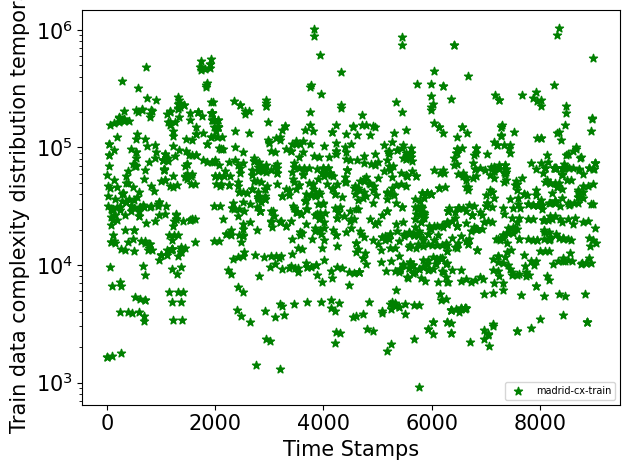

In [71]:
import pandas as pd

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

# scales
for city in config.city_list:

    cityname = city.lower()

    for CSR_type in [
    'cx',
        ]:

        cityname = city.lower()

        city_label_printed = []
        
        df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        


        for scale in config.scales_def:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap
                    print (filtered_rows.shape)
                    # if printing only some points star even if multiple present, uncomment below:
                    # range_ = list(range(1000))
                    
                    for i in tqdm(range_, desc="generating-plot"):
                        if cityname in city_label_printed:
                            plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',color=city_color[cityname], alpha=1)
                        else:
                            plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',label=cityname + "-cx-train", alpha=1, color=city_color[cityname])
                            city_label_printed.append(cityname)

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()





generating-plot: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:05<00:00, 260.02it/s]


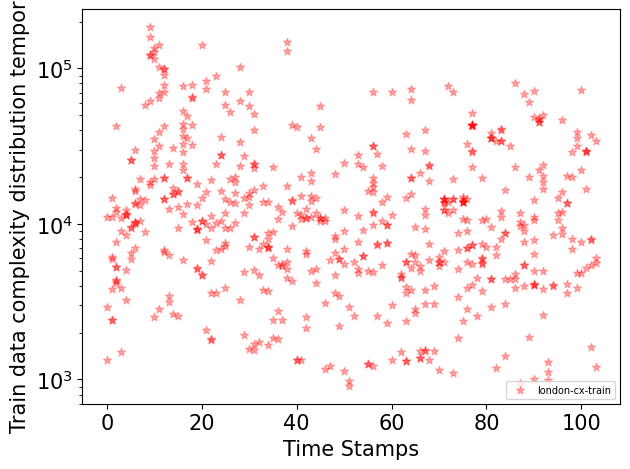

generating-plot: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:05<00:00, 257.66it/s]


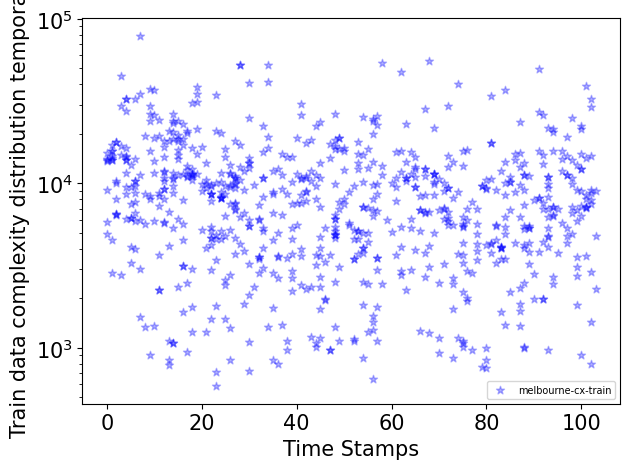

generating-plot: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:05<00:00, 250.57it/s]


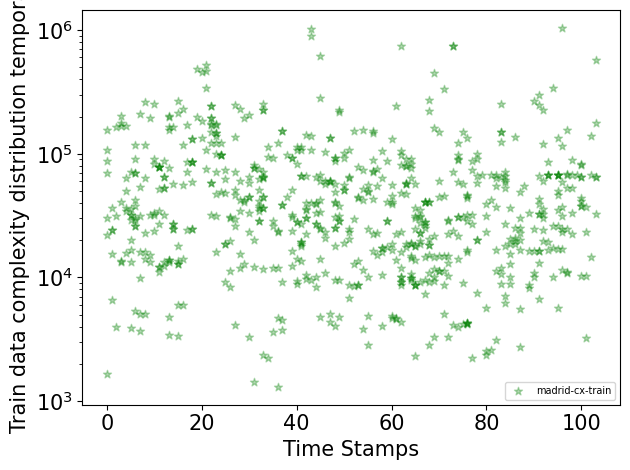

In [4]:
import pandas as pd

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

# scales
for city in config.city_list:

    cityname = city.lower()

    for CSR_type in [
    'cx',
        ]:

        cityname = city.lower()

        city_label_printed = []
        
        df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        


        for scale in config.scales_def:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # if printing only some points star even if multiple present, uncomment below:
                    # range_ = list(range(1000))
                    
                    for i in tqdm(range_, desc="generating-plot"):
                        if cityname in city_label_printed:
                            plt.scatter(filtered_rows.iloc[i]["time_stamp"]//periodicity,  filtered_rows.iloc[i][CSR_type], marker='*',color=city_color[cityname], alpha=0.3)
                        else:
                            plt.scatter(filtered_rows.iloc[i]["time_stamp"]//periodicity,  filtered_rows.iloc[i][CSR_type], marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])
                            city_label_printed.append(cityname)

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()





generating-plot: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:20<00:00, 149.21it/s]


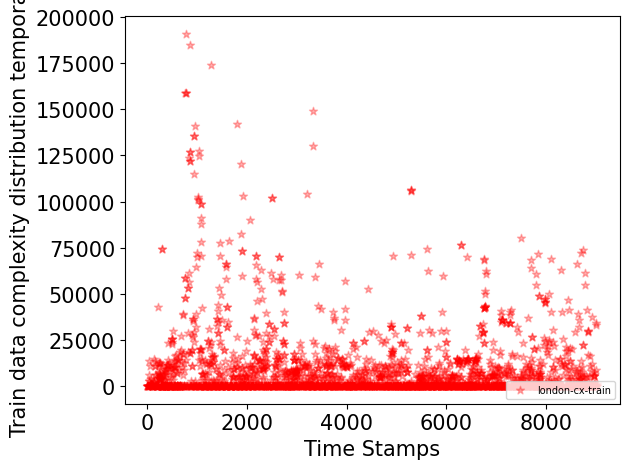

generating-plot: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:19<00:00, 152.94it/s]


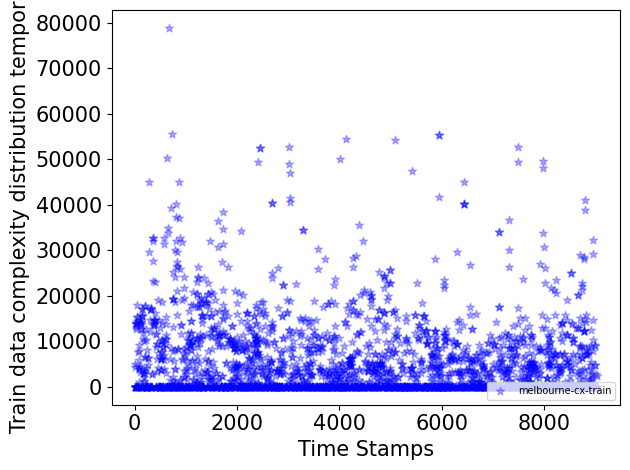

generating-plot: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:19<00:00, 153.73it/s]


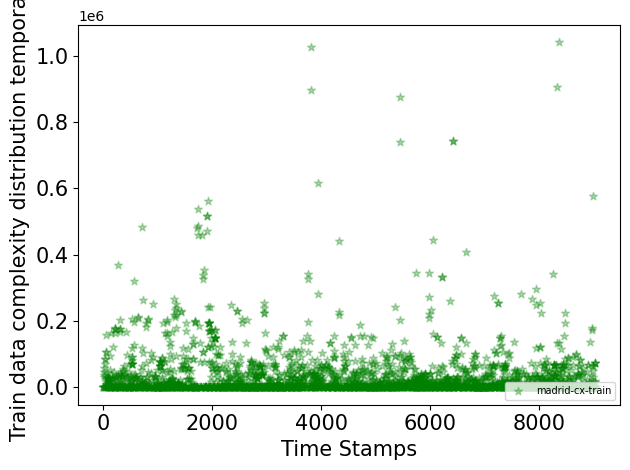

In [85]:
import pandas as pd

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

# scales

violin_plot_dict = {}

for city in config.city_list:

    cityname = city.lower()

    for CSR_type in [
    'cx',
        ]:

        cityname = city.lower()

        city_label_printed = []
        
        df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        


        for scale in config.scales_def:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # if printing only some points star even if multiple present, uncomment below:
                    # range_ = list(range(2000))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        if cityname in city_label_printed:
                            plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',color=city_color[cityname], alpha=0.3)
                        else:
                            plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])
                            city_label_printed.append(cityname)
                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict[cityname, i_o_length, pred_horiz, scale] = violin_plot

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    # plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()





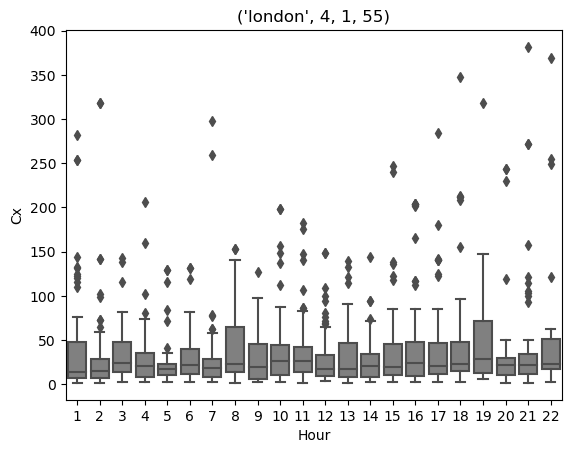

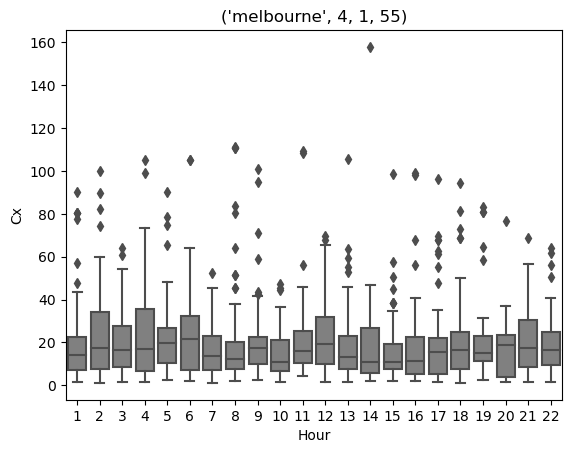

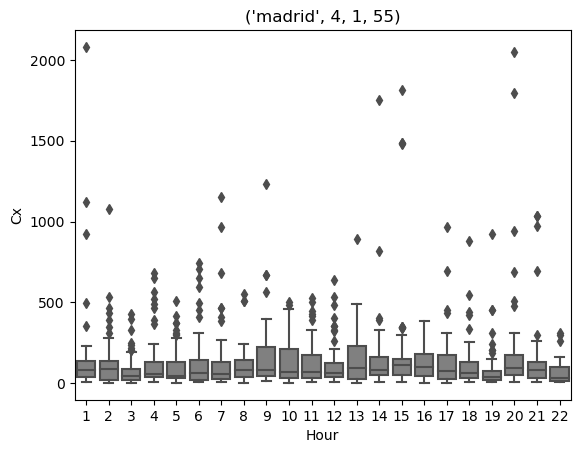

In [100]:
import seaborn as sns
for key in violin_plot_dict:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 55:
        continue

    df = pd.DataFrame(violin_plot_dict[key], columns = ['ToD', 'Cx'])
    df = df[(df["Cx"] > 0)]
    
    # df = df [(df["ToD"] % 4 == 0)] 
    # df["ToD"] = df["ToD"] // 4 + 1 # plus 1 for removing edge effect (due to input length)
    
    periodicity = 96 - (pred_horiz + i_o_length * 2)
    
    df["Cx"] /= 500
    df["Day"] = df["ToD"] // periodicity
    df["Hour"] = ( df["ToD"] % periodicity ) // 4 + 1 # plus 1 for removing edge effect (due to input length) of 4
    
    sns.boxplot(data=df, x="Hour", y="Cx", color="gray")
    plt.title(str(key))
    plt.savefig(str(key)+"_hourly_plots.png",dpi=600)
    # plt.ylim(0, 600)
    plt.show()

In [76]:
df["Hour"]

0       18
1       19
2        6
3       14
4        4
        ..
2995     3
2996    19
2997    14
2998     2
2999    18
Name: Hour, Length: 3000, dtype: int64

In [19]:
df [(df["ToD"] % 4 == 0)] 

,ToD,Cx
41,16,0.0
54,16,0.0
82,16,0.0
83,16,9156.0
87,4,0.0
89,20,9955.0
94,16,0.0
125,16,0.0
137,12,0.0
142,20,0.0
